# COSIT 2024 Short Paper _ Pre-Processing Step 1 Selecting Navigation Only and Visualisation Part 1

This is the base of the code for the short paper at COSIT. Exploaratory Analysis on the two main tests which are the Spatial Anxiety
and the Santa Barbara Sense of Direction and they relation with Mobile Map App Usage and GPS DATA

# STEP 1: PRE-PROCESSING

In this first step I will load data and have 1 dataset including gps data and phone sessions with mobile map app session inside. This does not exclude also other apps used in the same session

In [1]:
# Load the Packages Needed:
import pandas as pd
from pathlib import Path
import numpy as np
import ast
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime


In [2]:
# Load Tap Data Preprocessed with Apps
tap_data = pd.read_csv('updated_category_tap_data_preprocessed.csv', usecols=lambda column: column not in ['Unnamed: 0'])
tap_data

,id,taps,start,stop,appIds0,tapsSession,lengthSession,partId,timeZone,tapDeviceId,application,category
0,00e98a60-cfbc-11ed-a03c-bf72362c36e7,"'1680260654282', '1680260656216'",1.680261e+12,1.680261e+12,"'4', '6'",2,1934,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"['com.miui.home', 'com.whatsapp']","['LIFESTYLE', 'COMMUNICATION']"
1,00e9b170-cfbc-11ed-a03c-bf72362c36e7,"'1680260848742', '1680260849767', '16802608503...",1.680261e+12,1.680261e+12,"'6', '6', '6', '6', '6', '6', '6', '6', '6', '...",91,51590,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"['com.whatsapp', 'com.whatsapp', 'com.whatsapp...","['COMMUNICATION', 'COMMUNICATION', 'COMMUNICAT..."
2,00ea26a0-cfbc-11ed-a03c-bf72362c36e7,"'1680260926555', '1680260929904'",1.680261e+12,1.680261e+12,"'6', '6'",2,3349,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"['com.whatsapp', 'com.whatsapp']","['COMMUNICATION', 'COMMUNICATION']"
3,00ea4db0-cfbc-11ed-a03c-bf72362c36e7,"'1680261384529', '1680261386184', '16802613869...",1.680261e+12,1.680261e+12,"'6', '6', '6', '6', '6', '6', '6', '6', '6', '...",34,12116,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"['com.whatsapp', 'com.whatsapp', 'com.whatsapp...","['COMMUNICATION', 'COMMUNICATION', 'COMMUNICAT..."
4,00ea4db1-cfbc-11ed-a03c-bf72362c36e7,"'1680261520872', '1680261522223', '16802615240...",1.680262e+12,1.680262e+12,"'6', '6', '6', '6', '6', '6', '6', '6', '6', '...",20,12383,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"['com.whatsapp', 'com.whatsapp', 'com.whatsapp...","['COMMUNICATION', 'COMMUNICATION', 'COMMUNICAT..."
...,...,...,...,...,...,...,...,...,...,...,...,...
61301,fea3361e-f3a7-42e2-aa9c-29b7c13d2fc8,"'1688567611127', '1688567611634'",1.688568e+12,1.688568e+12,"'4', '4'",2,507,138e0aa217a29b6e43b191d55547762fb7bc28eb,'Asia/Kathmandu','aba9995c-d17c-4759-b6fc-bc5f75a1cfe4',"['com.oppo.launcher', 'com.oppo.launcher']","['TOOLS', 'TOOLS']"
61302,fec83b19-38e1-4685-a8cd-fb8a63b4b9b7,"'1687686629107', '1687686630650', '16876866320...",1.687687e+12,1.687687e+12,"'25', '25', '25', '25', '25', '25', '25', '25'...",55,232127,138e0aa217a29b6e43b191d55547762fb7bc28eb,'Asia/Kathmandu','aba9995c-d17c-4759-b6fc-bc5f75a1cfe4',"['com.zhiliaoapp.musically', 'com.zhiliaoapp.m...","['SOCIAL', 'SOCIAL', 'SOCIAL', 'SOCIAL', 'SOCI..."
61303,fefc5f0a-ae06-495b-9ab8-bc5d55a6c37a,"'1688194591567', '1688194595574', '16881946022...",1.688195e+12,1.688195e+12,"'4', '36', '36', '36', '36', '36', '36', '36',...",72,302195,138e0aa217a29b6e43b191d55547762fb7bc28eb,'Asia/Kathmandu','aba9995c-d17c-4759-b6fc-bc5f75a1cfe4',"['com.oppo.launcher', 'com.instagram.android',...","['TOOLS', 'SOCIAL', 'SOCIAL', 'SOCIAL', 'SOCIA..."
61304,33da6d62-a24b-4fac-911e-5210163999d8,"'1685715102620', '1685715103191', '16857151045...",1.685715e+12,1.685715e+12,"'1', '1', '4', '1', '1', '3', '3', '3', '3', '...",18,198617,138e4fc6a0c3f9c84a748783729e965d586628eb,'Europe/Rome','01e797d4-2d69-4a04-abad-0f53de6eb216',"['com.sec.android.app.launcher', 'com.sec.andr...","['PERSONALIZATION', 'PERSONALIZATION', '-1', '..."


In [3]:
# Remove Unneccesary brackets brought upon when merging my data
tap_data = tap_data.astype(str).replace({'\[':'', '\]':''}, regex=True).astype(str)
tap_data

,id,taps,start,stop,appIds0,tapsSession,lengthSession,partId,timeZone,tapDeviceId,application,category
0,00e98a60-cfbc-11ed-a03c-bf72362c36e7,"'1680260654282', '1680260656216'",1680260650000.0,1680260680000.0,"'4', '6'",2,1934,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"'com.miui.home', 'com.whatsapp'","'LIFESTYLE', 'COMMUNICATION'"
1,00e9b170-cfbc-11ed-a03c-bf72362c36e7,"'1680260848742', '1680260849767', '16802608503...",1680260850000.0,1680260900000.0,"'6', '6', '6', '6', '6', '6', '6', '6', '6', '...",91,51590,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"'com.whatsapp', 'com.whatsapp', 'com.whatsapp'...","'COMMUNICATION', 'COMMUNICATION', 'COMMUNICATI..."
2,00ea26a0-cfbc-11ed-a03c-bf72362c36e7,"'1680260926555', '1680260929904'",1680260920000.0,1680260940000.0,"'6', '6'",2,3349,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"'com.whatsapp', 'com.whatsapp'","'COMMUNICATION', 'COMMUNICATION'"
3,00ea4db0-cfbc-11ed-a03c-bf72362c36e7,"'1680261384529', '1680261386184', '16802613869...",1680261380000.0,1680261400000.0,"'6', '6', '6', '6', '6', '6', '6', '6', '6', '...",34,12116,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"'com.whatsapp', 'com.whatsapp', 'com.whatsapp'...","'COMMUNICATION', 'COMMUNICATION', 'COMMUNICATI..."
4,00ea4db1-cfbc-11ed-a03c-bf72362c36e7,"'1680261520872', '1680261522223', '16802615240...",1680261520000.0,1680261540000.0,"'6', '6', '6', '6', '6', '6', '6', '6', '6', '...",20,12383,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"'com.whatsapp', 'com.whatsapp', 'com.whatsapp'...","'COMMUNICATION', 'COMMUNICATION', 'COMMUNICATI..."
...,...,...,...,...,...,...,...,...,...,...,...,...
61301,fea3361e-f3a7-42e2-aa9c-29b7c13d2fc8,"'1688567611127', '1688567611634'",1688567610000.0,1688567610000.0,"'4', '4'",2,507,138e0aa217a29b6e43b191d55547762fb7bc28eb,'Asia/Kathmandu','aba9995c-d17c-4759-b6fc-bc5f75a1cfe4',"'com.oppo.launcher', 'com.oppo.launcher'","'TOOLS', 'TOOLS'"
61302,fec83b19-38e1-4685-a8cd-fb8a63b4b9b7,"'1687686629107', '1687686630650', '16876866320...",1687686620000.0,1687686860000.0,"'25', '25', '25', '25', '25', '25', '25', '25'...",55,232127,138e0aa217a29b6e43b191d55547762fb7bc28eb,'Asia/Kathmandu','aba9995c-d17c-4759-b6fc-bc5f75a1cfe4',"'com.zhiliaoapp.musically', 'com.zhiliaoapp.mu...","'SOCIAL', 'SOCIAL', 'SOCIAL', 'SOCIAL', 'SOCIA..."
61303,fefc5f0a-ae06-495b-9ab8-bc5d55a6c37a,"'1688194591567', '1688194595574', '16881946022...",1688194590000.0,1688194900000.0,"'4', '36', '36', '36', '36', '36', '36', '36',...",72,302195,138e0aa217a29b6e43b191d55547762fb7bc28eb,'Asia/Kathmandu','aba9995c-d17c-4759-b6fc-bc5f75a1cfe4',"'com.oppo.launcher', 'com.instagram.android', ...","'TOOLS', 'SOCIAL', 'SOCIAL', 'SOCIAL', 'SOCIAL..."
61304,33da6d62-a24b-4fac-911e-5210163999d8,"'1685715102620', '1685715103191', '16857151045...",1685715100000.0,1685715310000.0,"'1', '1', '4', '1', '1', '3', '3', '3', '3', '...",18,198617,138e4fc6a0c3f9c84a748783729e965d586628eb,'Europe/Rome','01e797d4-2d69-4a04-abad-0f53de6eb216',"'com.sec.android.app.launcher', 'com.sec.andro...","'PERSONALIZATION', 'PERSONALIZATION', '-1', 'P..."


In [4]:
# Function to convert string representation of a list into actual lists
def parse_string_list(row):
    try:
        # Remove surrounding double quotes and convert to list
        return ast.literal_eval(row.strip('"'))
    except Exception as e:
        # In case of error, return an empty list or log the error
        print(f"Error parsing row: {e}")
        return []


In [5]:
# Function to convert string representation of a list into actual lists (modified to work with applications)

def custom_parse_correctly(row):
    if isinstance(row, str):
        try:
            # Check and remove the leading and trailing double quotes if they exist
            if row.startswith("\"\"'") and row.endswith("'\"\""):
                row = row[3:-3]
            elif row.startswith("\"") and row.endswith("\""):
                row = row[1:-1]
            # Split by "', '" to separate elements and strip single quotes from each
            elements = row.split("', '")
            elements = [element.strip("'") for element in elements]
            return elements
        except Exception as e:
            print(f"Error parsing row: {e}")
            return []
    else:
        print(f"Unexpected data type: {type(row)}")
        return []

In [6]:
tap_data['partId']

0        138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb
1        138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb
2        138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb
3        138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb
4        138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb
                           ...                   
61301    138e0aa217a29b6e43b191d55547762fb7bc28eb
61302    138e0aa217a29b6e43b191d55547762fb7bc28eb
61303    138e0aa217a29b6e43b191d55547762fb7bc28eb
61304    138e4fc6a0c3f9c84a748783729e965d586628eb
61305    138e4fc6a0c3f9c84a748783729e965d586628eb
Name: partId, Length: 61306, dtype: object

In [7]:
# Apply function to partId and Category 
#tap_data['partId'] = tap_data['partId'].apply(parse_string_list)
tap_data['category'] = tap_data['category'].apply(parse_string_list)
tap_data['application'] = tap_data['application'].apply(custom_parse_correctly)


In [8]:
# Create an empty dictionary to map application to category directly without normalization
app_to_cat = {}

# Iterate over each row in tap_data to build the mapping without normalization
for index, row in tap_data.iterrows():
    applications = row['application']
    categories = row['category']
    
    for app, cat in zip(applications, categories):
        # Use app identifier as is, without converting to lower case or stripping whitespace
        app_to_cat[app] = cat


In [9]:
# remove android 

import pandas as pd

# Assuming your DataFrame is named gps_app and it's already loaded and prepared
# And assuming the 'application' column contains lists of application identifiers

# Define the target application to filter out
target_app_1 = 'android'

# Filter the DataFrame to exclude rows where the application list contains the target application
filtered_df = tap_data[~tap_data['application'].apply(lambda apps: target_app_1 in apps)].copy()

filtered_df


,id,taps,start,stop,appIds0,tapsSession,lengthSession,partId,timeZone,tapDeviceId,application,category
0,00e98a60-cfbc-11ed-a03c-bf72362c36e7,"'1680260654282', '1680260656216'",1680260650000.0,1680260680000.0,"'4', '6'",2,1934,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.miui.home, com.whatsapp]","(LIFESTYLE, COMMUNICATION)"
1,00e9b170-cfbc-11ed-a03c-bf72362c36e7,"'1680260848742', '1680260849767', '16802608503...",1680260850000.0,1680260900000.0,"'6', '6', '6', '6', '6', '6', '6', '6', '6', '...",91,51590,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","(COMMUNICATION, COMMUNICATION, COMMUNICATION, ..."
2,00ea26a0-cfbc-11ed-a03c-bf72362c36e7,"'1680260926555', '1680260929904'",1680260920000.0,1680260940000.0,"'6', '6'",2,3349,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp]","(COMMUNICATION, COMMUNICATION)"
3,00ea4db0-cfbc-11ed-a03c-bf72362c36e7,"'1680261384529', '1680261386184', '16802613869...",1680261380000.0,1680261400000.0,"'6', '6', '6', '6', '6', '6', '6', '6', '6', '...",34,12116,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","(COMMUNICATION, COMMUNICATION, COMMUNICATION, ..."
4,00ea4db1-cfbc-11ed-a03c-bf72362c36e7,"'1680261520872', '1680261522223', '16802615240...",1680261520000.0,1680261540000.0,"'6', '6', '6', '6', '6', '6', '6', '6', '6', '...",20,12383,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","(COMMUNICATION, COMMUNICATION, COMMUNICATION, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
61301,fea3361e-f3a7-42e2-aa9c-29b7c13d2fc8,"'1688567611127', '1688567611634'",1688567610000.0,1688567610000.0,"'4', '4'",2,507,138e0aa217a29b6e43b191d55547762fb7bc28eb,'Asia/Kathmandu','aba9995c-d17c-4759-b6fc-bc5f75a1cfe4',"[com.oppo.launcher, com.oppo.launcher]","(TOOLS, TOOLS)"
61302,fec83b19-38e1-4685-a8cd-fb8a63b4b9b7,"'1687686629107', '1687686630650', '16876866320...",1687686620000.0,1687686860000.0,"'25', '25', '25', '25', '25', '25', '25', '25'...",55,232127,138e0aa217a29b6e43b191d55547762fb7bc28eb,'Asia/Kathmandu','aba9995c-d17c-4759-b6fc-bc5f75a1cfe4',"[com.zhiliaoapp.musically, com.zhiliaoapp.musi...","(SOCIAL, SOCIAL, SOCIAL, SOCIAL, SOCIAL, SOCIA..."
61303,fefc5f0a-ae06-495b-9ab8-bc5d55a6c37a,"'1688194591567', '1688194595574', '16881946022...",1688194590000.0,1688194900000.0,"'4', '36', '36', '36', '36', '36', '36', '36',...",72,302195,138e0aa217a29b6e43b191d55547762fb7bc28eb,'Asia/Kathmandu','aba9995c-d17c-4759-b6fc-bc5f75a1cfe4',"[com.oppo.launcher, com.instagram.android, com...","(TOOLS, SOCIAL, SOCIAL, SOCIAL, SOCIAL, SOCIAL..."
61304,33da6d62-a24b-4fac-911e-5210163999d8,"'1685715102620', '1685715103191', '16857151045...",1685715100000.0,1685715310000.0,"'1', '1', '4', '1', '1', '3', '3', '3', '3', '...",18,198617,138e4fc6a0c3f9c84a748783729e965d586628eb,'Europe/Rome','01e797d4-2d69-4a04-abad-0f53de6eb216',"[com.sec.android.app.launcher, com.sec.android...","(PERSONALIZATION, PERSONALIZATION, -1, PERSONA..."


In [10]:
# remove mapontap

import pandas as pd

# Assuming your DataFrame is named gps_app and it's already loaded and prepared
# And assuming the 'application' column contains lists of application identifiers

# Define the target application to filter out
target_app = 'ch.uzh.geo.mapontap'

# Filter the DataFrame to exclude rows where the application list contains the target application
filtered_df = filtered_df[~filtered_df['application'].apply(lambda apps: target_app in apps)].copy()

filtered_df


,id,taps,start,stop,appIds0,tapsSession,lengthSession,partId,timeZone,tapDeviceId,application,category
0,00e98a60-cfbc-11ed-a03c-bf72362c36e7,"'1680260654282', '1680260656216'",1680260650000.0,1680260680000.0,"'4', '6'",2,1934,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.miui.home, com.whatsapp]","(LIFESTYLE, COMMUNICATION)"
1,00e9b170-cfbc-11ed-a03c-bf72362c36e7,"'1680260848742', '1680260849767', '16802608503...",1680260850000.0,1680260900000.0,"'6', '6', '6', '6', '6', '6', '6', '6', '6', '...",91,51590,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","(COMMUNICATION, COMMUNICATION, COMMUNICATION, ..."
2,00ea26a0-cfbc-11ed-a03c-bf72362c36e7,"'1680260926555', '1680260929904'",1680260920000.0,1680260940000.0,"'6', '6'",2,3349,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp]","(COMMUNICATION, COMMUNICATION)"
3,00ea4db0-cfbc-11ed-a03c-bf72362c36e7,"'1680261384529', '1680261386184', '16802613869...",1680261380000.0,1680261400000.0,"'6', '6', '6', '6', '6', '6', '6', '6', '6', '...",34,12116,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","(COMMUNICATION, COMMUNICATION, COMMUNICATION, ..."
4,00ea4db1-cfbc-11ed-a03c-bf72362c36e7,"'1680261520872', '1680261522223', '16802615240...",1680261520000.0,1680261540000.0,"'6', '6', '6', '6', '6', '6', '6', '6', '6', '...",20,12383,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","(COMMUNICATION, COMMUNICATION, COMMUNICATION, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
61300,fe84afa5-2352-47df-90c1-ffe338ca03dc,"'1688973428197', '1688973437476', '16889734449...",1688973410000.0,1688973540000.0,"'16', '16', '16', '16', '16', '16', '16', '16'...",20,52813,138e0aa217a29b6e43b191d55547762fb7bc28eb,'Asia/Kathmandu','aba9995c-d17c-4759-b6fc-bc5f75a1cfe4',"[com.microsoft.teams, com.microsoft.teams, com...","(BUSINESS, BUSINESS, BUSINESS, BUSINESS, BUSIN..."
61301,fea3361e-f3a7-42e2-aa9c-29b7c13d2fc8,"'1688567611127', '1688567611634'",1688567610000.0,1688567610000.0,"'4', '4'",2,507,138e0aa217a29b6e43b191d55547762fb7bc28eb,'Asia/Kathmandu','aba9995c-d17c-4759-b6fc-bc5f75a1cfe4',"[com.oppo.launcher, com.oppo.launcher]","(TOOLS, TOOLS)"
61302,fec83b19-38e1-4685-a8cd-fb8a63b4b9b7,"'1687686629107', '1687686630650', '16876866320...",1687686620000.0,1687686860000.0,"'25', '25', '25', '25', '25', '25', '25', '25'...",55,232127,138e0aa217a29b6e43b191d55547762fb7bc28eb,'Asia/Kathmandu','aba9995c-d17c-4759-b6fc-bc5f75a1cfe4',"[com.zhiliaoapp.musically, com.zhiliaoapp.musi...","(SOCIAL, SOCIAL, SOCIAL, SOCIAL, SOCIAL, SOCIA..."
61303,fefc5f0a-ae06-495b-9ab8-bc5d55a6c37a,"'1688194591567', '1688194595574', '16881946022...",1688194590000.0,1688194900000.0,"'4', '36', '36', '36', '36', '36', '36', '36',...",72,302195,138e0aa217a29b6e43b191d55547762fb7bc28eb,'Asia/Kathmandu','aba9995c-d17c-4759-b6fc-bc5f75a1cfe4',"[com.oppo.launcher, com.instagram.android, com...","(TOOLS, SOCIAL, SOCIAL, SOCIAL, SOCIAL, SOCIAL..."


In [11]:
# take only phone sessions where tareget categories are for maps and travel

target_categories = {'MAPS_AND_NAVIGATION', 'TRAVEL_AND_LOCAL'}

def session_contains_target_category(categories):
    # Check if categories is None or empty
    if not categories:
        return False
    # Check if any of the categories in the session are target categories
    return any(category in target_categories for category in categories)

def get_categories_for_session(row):
    # Assuming 'application' is a list of application identifiers for the session
    apps = row['application']
    # Map each app to its category using the app_to_cat dictionary
    categories = [app_to_cat.get(app, '-1') for app in apps]
    return categories

In [12]:
filtered_maps = filtered_df[filtered_df.apply(lambda row: session_contains_target_category(get_categories_for_session(row)), axis=1)]
filtered_maps

,id,taps,start,stop,appIds0,tapsSession,lengthSession,partId,timeZone,tapDeviceId,application,category
12,018ad520-ce98-11ed-ba2a-dfe7d46df14d,"'1680119342683', '1680119355131', '16801193593...",1680119340000.0,1680121540000.0,"'4', '4', '6', '6', '23', '23', '23', '4', '6'...",574,2193873,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.miui.home, com.miui.home, com.whatsapp, c...","(LIFESTYLE, LIFESTYLE, COMMUNICATION, COMMUNIC..."
26,04e18c70-cfa4-11ed-ba2a-dfe7d46df14d,"'1680220903986', '1680220904266', '16802209049...",1680220900000.0,1680222730000.0,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","(COMMUNICATION, COMMUNICATION, COMMUNICATION, ..."
29,04f2a370-cfa4-11ed-ba2a-dfe7d46df14d,"'1680220903986', '1680220904266', '16802209049...",1680220900000.0,1680222730000.0,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","(COMMUNICATION, COMMUNICATION, COMMUNICATION, ..."
32,04fd78e0-cfa4-11ed-ba2a-dfe7d46df14d,"'1680220903986', '1680220904266', '16802209049...",1680220900000.0,1680222730000.0,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","(COMMUNICATION, COMMUNICATION, COMMUNICATION, ..."
35,051edc40-cc72-11ed-ba2a-dfe7d46df14d,"'1679902268000', '1679902268713', '16799022821...",1679902250000.0,1679902300000.0,"'4', '4', '20', '20', '20', '20', '20'",7,27638,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.miui.home, com.miui.home, com.google.andr...","(LIFESTYLE, LIFESTYLE, TRAVEL_AND_LOCAL, TRAVE..."
...,...,...,...,...,...,...,...,...,...,...,...,...
59866,bfe6041f-3f74-42a1-87a3-8ce1f144c8f5,"'1687679228006', '1687679228415', '16876792284...",1687679130000.0,1687679260000.0,"'13', '13', '13', '13', '13', '13', '13', '13'...",42,26463,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',"[com.google.android.googlequicksearchbox, com....","(TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOO..."
59957,d24a1676-05dd-4ee7-ab7b-abfbe6e57e5a,"'1687679583122', '1687679584175', '16876795855...",1687679580000.0,1687679590000.0,"'13', '20', '2', '2'",4,3094,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',"[com.google.android.googlequicksearchbox, com....","(TOOLS, TRAVEL_AND_LOCAL, TOOLS, TOOLS)"
60176,f88771f5-8e02-48e1-93bc-7c7fe7b23564,"'1687926778680', '1687926779084', '16879267794...",1687926770000.0,1687926830000.0,"'2', '2', '2', '2', '2', '2', '2', '20', '20',...",36,52744,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',"[com.lge.launcher3, com.lge.launcher3, com.lge...","(TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOO..."
60177,f8c448f8-734a-4180-a8cc-4cf2bed6adb2,"'1686322041785', '1686322042357', '16863220466...",1686322040000.0,1686322560000.0,"'3', '3', '4', '4', '4', '4', '2', '2', '2', '...",559,518806,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','5eea8028-43e5-46ad-8eed-84cbf65f36fb',"[com.android.settings, com.android.settings, c...","(TOOLS, TOOLS, COMMUNICATION, COMMUNICATION, C..."


# NAVIGATION ONLY

There is a new filter out needed. We want applications of Mobile Maps and Travel categories to retain only belonging to navigation/route or travel planning and not to anythin else. This has meant to me to visually. inspect all the apps found in maps and selecting in the description found only the one of interest. 

In [13]:
# Initialize an empty list to hold unique applications related to the specific categories
unique_applications = set()

# Iterate through each row in the DataFrame
for _, row in filtered_maps.iterrows():
    # Pair each application with its corresponding category
    for application, category in zip(row['application'], row['category']):
        # Check if the category of the application is one of the specified categories
        if category in ['MAPS_AND_NAVIGATION', 'TRAVEL_AND_LOCAL']:
            # Add the application to the set of unique applications
            unique_applications.add(application)

# Convert the set back to a list if you need the result in list form
unique_applications_list = list(unique_applications)
# return the list of all maps related app found in the dataset
unique_applications_list

['se.sas.android',
 'nl.jool.isic',
 'de.schildbach.oeffi',
 'ch.search.android.search',
 'com.thws.GPS',
 'com.ridemovi.app',
 'ch.publibike.app',
 'com.yoc.swiss.swiss',
 'com.limebike',
 'it.bz.provincia.altoadigetogo.android',
 'com.tratao.xcurrency',
 'com.flightradar24free',
 'ca.gc.cbsa.coronavirus',
 'ee.mtakso.client',
 'com.here.app.maps',
 'at.oebb.ts',
 'ch.admin.swisstopo',
 'cz.seznam.mapy',
 'com.ba.mobile',
 'com.ryanair.cheapflights',
 'it.webmapp.cammini',
 'com.skypicker.main',
 'com.pozitron.pegasus',
 'net.easypark.android',
 'cs.swisscharge',
 'com.vsct.vsc.mobile.horaireetresa.android',
 'com.booking',
 'com.mobime.ecooltra',
 'net.pluservice.myCicero',
 'net.osmand',
 'ru.aviasales',
 'com.iternio.abrpapp',
 'com.fluidtime.android.avv',
 'me.lyft.android',
 'com.superpedestrian.link',
 'com.airbnb.android',
 'com.tagxter.fzjapp',
 'fr.geovelo',
 'ctrip.english',
 'it.atm.appmobile',
 'com.kayak.android',
 'com.mnemeray.map_uncover',
 'com.iberia.android',
 'inte

# Travel and Local Applications

## Airlines and Flight Information
- `com.turkishairlines.mobile` - Turkish Airlines Mobile App
- `se.sas.android` - SAS Scandinavian Airlines
- `com.ba.mobile` - British Airways
- `com.united.mobile.android` - United Airlines
- `com.ryanair.cheapflights` - Ryanair Cheap Flights
- `com.iberia.android` - Iberia Airlines
- `com.aircanada` - Air Canada

## Train and Public Transport
- `it.atm.appmobile` - ATM Milano Official App
- `ch.sbb.mobile.android.b2c` - SBB Mobile (Swiss Federal Railways)
- `de.hafas.android.db` - DB Navigator (German Railways)
- `at.oebb.ts` - ÖBB (Austrian Federal Railways)
- `nl.ns.android.activity` - NS (Dutch Railways)
- ProntoTreno: `com.lynxspa.prontotreno`
- `it.italotreno` - Italo Treno
- ZVV Ticket App: `ch.mnc.zvv.oneapp`
- Pakistan Railways: `pk.gov.railways`
- Alto Adige To Go: `it.bz.provincia.altoadigetogo.android`
- Trainline EU: `com.thetrainline`

## Mobility and Sharing Services
- `com.limebike` - Lime Bike and Scooter Sharing
- `com.mobime.ecooltra` - eCooltra Scooters
- `ch.mobility.mobidroid.main` - Mobility Car Sharing (Switzerland)
- `com.tier.app` - TIER Mobility
- `com.lynxspa.prontotreno` - Lynx Spa (ProntoTreno)

## Maps and Navigation
- `com.google.android.apps.maps` - Google Maps
- `ch.admin.swisstopo.swissmap` - SwissTopo (Swiss Maps)
- `cz.seznam.mapy` - Mapy.cz (Czech Maps)
- `com.here.app.maps` - HERE WeGo Maps
- `net.osmand` - OsmAnd — Offline Maps
-`ch.stzh.zueriplan`- ZueriPlan: 
- Geovelo: `fr.geovelo`
- SchweizMobil: `ch.schweizmobil`
- ABRP: `com.iternio.abrpapp`

## Travel Planning and Booking
- `com.kayak.android` - KAYAK Flights, Hotels & Cars
- `com.booking` - Booking.com
- `com.airbnb.android` - Airbnb
- `com.tripadvisor.tripadvisor` - TripAdvisor Hotels Flights Restaurants
- `com.skypicker.main` - Kiwi.com: Book Flights & Hotels

## Specialized and Other Apps
- `com.padi` - PADI - Scuba Diving Essentials
- `fr.tramb.park4night` - park4night - Motorhome camper
- `com.plannet.milesandmoreapp` - Miles & More
- `com.flightradar24free` - Flightradar24 Flight Tracker
- `ca.gc.cbsa.coronavirus` - Canada Border Services Agency Coronavirus Info

## Additional Travel and Local Apps
- FairTIQ: `com.fairtiq.android`
- MyCicero: `net.pluservice.myCicero`
- PubliBike: `ch.publibike.app`
- Link Scooters: `com.superpedestrian.link`
- park4night: `fr.tramb.park4night`
- iSKI Swiss: `intermaps.iskiswiss`
- Aviasales: `ru.aviasales`
- Urlaubspiraten: `com.tippingcanoe.urlaubspiraten`
- Droniq: `de.droniq.droniqapp`

- Search.ch: `ch.search.android.search`
- FlixBus: `de.flixbus.app`
- EasyPark: `net.easypark.android`
- Local.ch: `ch.local.android`
- BKK FUTÁR: `hu.webvalto.bkkfutar`
- Takso: `ee.mtakso.client`
- CBSA: `ca.gc.cbsa.coronavirus`
- FZJ App: `com.tagxter.fzjapp`
- Öffi: `de.schildbach.oeffi`
- PADI: `com.duns.padiapp`

- Miles & More: `com.plannet.milesandmoreapp`
- V.SCT: `com.vsct.vsc.mobile.horaireetresa.android`
- MOIA: `io.moia.neptune`
- XE Currency: `com.tratao.xcurrency`
- Europcar: `com.clanmo.europcar`
- Kiwi.com: `com.skypicker.main`

- Map Uncover: `com.mnemeray.map_uncover`

- EV Charging: `com.enbw.ev`
- Swiss Charge: `cs.swisscharge`
- OEBB Scotty: `de.hafas.android.oebb`
- Sentres: `com.sentres`
- NextBike: `net.nextbike.bkk.molbubi`
- AVV Mobil: `com.fluidtime.android.avv`

- ParkingCard: `ch.parkingcard.customer`
- PeakLens: `com.peaklens.ar`
- Pegasus: `com.pozitron.pegasus`

In [14]:
#From all the above we manually filtered the one related strictly to navigation and travel

applications_of_interest = [
    'com.here.app.maps',
    'com.fabernovel.ratp',
    'at.oebb.ts',
    'de.hafas.android.oebb',
    'com.iternio.abrpapp',
    'cz.seznam.mapy',
    'ch.admin.swisstopo',
    'com.google.android.apps.maps',
    'ch.schweizmobil',
    'net.osmand',
    'ch.stzh.zueriplan',
    'de.schildbach.oeffi',
    'hu.webvalto.bkkfutar',
    'com.tagxter.fzjapp',
    'com.sentres',
    'fr.geovelo',
    'ch.sbb.mobile.android.b2c',
    'it.atm.appmobile',
    'de.hafas.android.db',
    'nl.ns.android.activity',
    'com.lynxspa.prontotreno',
    'it.italotreno',
    'ch.mnc.zvv.oneapp',
    'pk.gov.railways',
    'it.bz.provincia.altoadigetogo.android',
    'com.thetrainline']

In [15]:
len(applications_of_interest)

26

In [16]:
# filter phone sessions only with those app of interest
filtered_maps_navigation = filtered_maps[filtered_maps['application'].apply(lambda apps: any(app in applications_of_interest for app in apps))].copy()
filtered_maps_navigation

,id,taps,start,stop,appIds0,tapsSession,lengthSession,partId,timeZone,tapDeviceId,application,category
12,018ad520-ce98-11ed-ba2a-dfe7d46df14d,"'1680119342683', '1680119355131', '16801193593...",1680119340000.0,1680121540000.0,"'4', '4', '6', '6', '23', '23', '23', '4', '6'...",574,2193873,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.miui.home, com.miui.home, com.whatsapp, c...","(LIFESTYLE, LIFESTYLE, COMMUNICATION, COMMUNIC..."
26,04e18c70-cfa4-11ed-ba2a-dfe7d46df14d,"'1680220903986', '1680220904266', '16802209049...",1680220900000.0,1680222730000.0,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","(COMMUNICATION, COMMUNICATION, COMMUNICATION, ..."
29,04f2a370-cfa4-11ed-ba2a-dfe7d46df14d,"'1680220903986', '1680220904266', '16802209049...",1680220900000.0,1680222730000.0,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","(COMMUNICATION, COMMUNICATION, COMMUNICATION, ..."
32,04fd78e0-cfa4-11ed-ba2a-dfe7d46df14d,"'1680220903986', '1680220904266', '16802209049...",1680220900000.0,1680222730000.0,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","(COMMUNICATION, COMMUNICATION, COMMUNICATION, ..."
35,051edc40-cc72-11ed-ba2a-dfe7d46df14d,"'1679902268000', '1679902268713', '16799022821...",1679902250000.0,1679902300000.0,"'4', '4', '20', '20', '20', '20', '20'",7,27638,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.miui.home, com.miui.home, com.google.andr...","(LIFESTYLE, LIFESTYLE, TRAVEL_AND_LOCAL, TRAVE..."
...,...,...,...,...,...,...,...,...,...,...,...,...
59866,bfe6041f-3f74-42a1-87a3-8ce1f144c8f5,"'1687679228006', '1687679228415', '16876792284...",1687679130000.0,1687679260000.0,"'13', '13', '13', '13', '13', '13', '13', '13'...",42,26463,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',"[com.google.android.googlequicksearchbox, com....","(TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOO..."
59957,d24a1676-05dd-4ee7-ab7b-abfbe6e57e5a,"'1687679583122', '1687679584175', '16876795855...",1687679580000.0,1687679590000.0,"'13', '20', '2', '2'",4,3094,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',"[com.google.android.googlequicksearchbox, com....","(TOOLS, TRAVEL_AND_LOCAL, TOOLS, TOOLS)"
60176,f88771f5-8e02-48e1-93bc-7c7fe7b23564,"'1687926778680', '1687926779084', '16879267794...",1687926770000.0,1687926830000.0,"'2', '2', '2', '2', '2', '2', '2', '20', '20',...",36,52744,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',"[com.lge.launcher3, com.lge.launcher3, com.lge...","(TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOO..."
60177,f8c448f8-734a-4180-a8cc-4cf2bed6adb2,"'1686322041785', '1686322042357', '16863220466...",1686322040000.0,1686322560000.0,"'3', '3', '4', '4', '4', '4', '2', '2', '2', '...",559,518806,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','5eea8028-43e5-46ad-8eed-84cbf65f36fb',"[com.android.settings, com.android.settings, c...","(TOOLS, TOOLS, COMMUNICATION, COMMUNICATION, C..."


In [17]:
#reset_index
filtered_maps_navigation = filtered_maps_navigation.reset_index(drop = True)

In [18]:
filtered_maps_navigation

,id,taps,start,stop,appIds0,tapsSession,lengthSession,partId,timeZone,tapDeviceId,application,category
0,018ad520-ce98-11ed-ba2a-dfe7d46df14d,"'1680119342683', '1680119355131', '16801193593...",1680119340000.0,1680121540000.0,"'4', '4', '6', '6', '23', '23', '23', '4', '6'...",574,2193873,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.miui.home, com.miui.home, com.whatsapp, c...","(LIFESTYLE, LIFESTYLE, COMMUNICATION, COMMUNIC..."
1,04e18c70-cfa4-11ed-ba2a-dfe7d46df14d,"'1680220903986', '1680220904266', '16802209049...",1680220900000.0,1680222730000.0,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","(COMMUNICATION, COMMUNICATION, COMMUNICATION, ..."
2,04f2a370-cfa4-11ed-ba2a-dfe7d46df14d,"'1680220903986', '1680220904266', '16802209049...",1680220900000.0,1680222730000.0,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","(COMMUNICATION, COMMUNICATION, COMMUNICATION, ..."
3,04fd78e0-cfa4-11ed-ba2a-dfe7d46df14d,"'1680220903986', '1680220904266', '16802209049...",1680220900000.0,1680222730000.0,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","(COMMUNICATION, COMMUNICATION, COMMUNICATION, ..."
4,051edc40-cc72-11ed-ba2a-dfe7d46df14d,"'1679902268000', '1679902268713', '16799022821...",1679902250000.0,1679902300000.0,"'4', '4', '20', '20', '20', '20', '20'",7,27638,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.miui.home, com.miui.home, com.google.andr...","(LIFESTYLE, LIFESTYLE, TRAVEL_AND_LOCAL, TRAVE..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4321,bfe6041f-3f74-42a1-87a3-8ce1f144c8f5,"'1687679228006', '1687679228415', '16876792284...",1687679130000.0,1687679260000.0,"'13', '13', '13', '13', '13', '13', '13', '13'...",42,26463,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',"[com.google.android.googlequicksearchbox, com....","(TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOO..."
4322,d24a1676-05dd-4ee7-ab7b-abfbe6e57e5a,"'1687679583122', '1687679584175', '16876795855...",1687679580000.0,1687679590000.0,"'13', '20', '2', '2'",4,3094,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',"[com.google.android.googlequicksearchbox, com....","(TOOLS, TRAVEL_AND_LOCAL, TOOLS, TOOLS)"
4323,f88771f5-8e02-48e1-93bc-7c7fe7b23564,"'1687926778680', '1687926779084', '16879267794...",1687926770000.0,1687926830000.0,"'2', '2', '2', '2', '2', '2', '2', '20', '20',...",36,52744,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',"[com.lge.launcher3, com.lge.launcher3, com.lge...","(TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOO..."
4324,f8c448f8-734a-4180-a8cc-4cf2bed6adb2,"'1686322041785', '1686322042357', '16863220466...",1686322040000.0,1686322560000.0,"'3', '3', '4', '4', '4', '4', '2', '2', '2', '...",559,518806,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','5eea8028-43e5-46ad-8eed-84cbf65f36fb',"[com.android.settings, com.android.settings, c...","(TOOLS, TOOLS, COMMUNICATION, COMMUNICATION, C..."


In [19]:
#save file as csv preprocessed for cosit
filtered_maps_navigation.to_csv('cosit_2024_preprocessed.csv')

In [20]:
filtered_maps_navigation

,id,taps,start,stop,appIds0,tapsSession,lengthSession,partId,timeZone,tapDeviceId,application,category
0,018ad520-ce98-11ed-ba2a-dfe7d46df14d,"'1680119342683', '1680119355131', '16801193593...",1680119340000.0,1680121540000.0,"'4', '4', '6', '6', '23', '23', '23', '4', '6'...",574,2193873,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.miui.home, com.miui.home, com.whatsapp, c...","(LIFESTYLE, LIFESTYLE, COMMUNICATION, COMMUNIC..."
1,04e18c70-cfa4-11ed-ba2a-dfe7d46df14d,"'1680220903986', '1680220904266', '16802209049...",1680220900000.0,1680222730000.0,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","(COMMUNICATION, COMMUNICATION, COMMUNICATION, ..."
2,04f2a370-cfa4-11ed-ba2a-dfe7d46df14d,"'1680220903986', '1680220904266', '16802209049...",1680220900000.0,1680222730000.0,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","(COMMUNICATION, COMMUNICATION, COMMUNICATION, ..."
3,04fd78e0-cfa4-11ed-ba2a-dfe7d46df14d,"'1680220903986', '1680220904266', '16802209049...",1680220900000.0,1680222730000.0,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","(COMMUNICATION, COMMUNICATION, COMMUNICATION, ..."
4,051edc40-cc72-11ed-ba2a-dfe7d46df14d,"'1679902268000', '1679902268713', '16799022821...",1679902250000.0,1679902300000.0,"'4', '4', '20', '20', '20', '20', '20'",7,27638,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.miui.home, com.miui.home, com.google.andr...","(LIFESTYLE, LIFESTYLE, TRAVEL_AND_LOCAL, TRAVE..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4321,bfe6041f-3f74-42a1-87a3-8ce1f144c8f5,"'1687679228006', '1687679228415', '16876792284...",1687679130000.0,1687679260000.0,"'13', '13', '13', '13', '13', '13', '13', '13'...",42,26463,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',"[com.google.android.googlequicksearchbox, com....","(TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOO..."
4322,d24a1676-05dd-4ee7-ab7b-abfbe6e57e5a,"'1687679583122', '1687679584175', '16876795855...",1687679580000.0,1687679590000.0,"'13', '20', '2', '2'",4,3094,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',"[com.google.android.googlequicksearchbox, com....","(TOOLS, TRAVEL_AND_LOCAL, TOOLS, TOOLS)"
4323,f88771f5-8e02-48e1-93bc-7c7fe7b23564,"'1687926778680', '1687926779084', '16879267794...",1687926770000.0,1687926830000.0,"'2', '2', '2', '2', '2', '2', '2', '20', '20',...",36,52744,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',"[com.lge.launcher3, com.lge.launcher3, com.lge...","(TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOO..."
4324,f8c448f8-734a-4180-a8cc-4cf2bed6adb2,"'1686322041785', '1686322042357', '16863220466...",1686322040000.0,1686322560000.0,"'3', '3', '4', '4', '4', '4', '2', '2', '2', '...",559,518806,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','5eea8028-43e5-46ad-8eed-84cbf65f36fb',"[com.android.settings, com.android.settings, c...","(TOOLS, TOOLS, COMMUNICATION, COMMUNICATION, C..."


# DATA VISUALISATION

In this section we visualise the main variables of our final dataset.
First: Final Dataset has 2050 phone sessions

In [21]:
len(filtered_maps_navigation['partId'].unique()) # 55 Participants

56

In [22]:
# Unique Categories and Applications overall:
len(unique_applications_list) # 89 unique Applications of maps and navigations
#len(applications_of_interest) #26 of interests for Navigations

89

In [23]:
# Count Unique category for applications and visualise them
application_to_category = {}

# Iterate through each row in the DataFrame
for _, row in filtered_maps_navigation.iterrows():
    applications = row['application']  # This is a list of applications
    categories = row['category']  # This is a corresponding list of categories
    
    # Iterate through each application and its corresponding category
    for app, cat in zip(applications, categories):
        # Update the dictionary with the application-category pair
        # This assumes that an application does not belong to more than one category
        application_to_category[app] = cat

In [24]:
# Map each application to its category for each participant
category_participant_pairs = [(application_to_category.get(app, 'Unknown'), row['partId']) for _, row in filtered_maps_navigation.iterrows() for app in row['application']]

# Convert to DataFrame
category_participant_df = pd.DataFrame(category_participant_pairs, columns=['Category', 'ParticipantID'])

# Drop duplicates to count each participant only once per category
unique_category_participant_df = category_participant_df.drop_duplicates()

# Count unique participants per category
participants_per_category = unique_category_participant_df.groupby('Category').count()

# Sort the counts for better visualization
sorted_participants_per_category = participants_per_category.sort_values(by='ParticipantID', ascending=False)

In [25]:
len(unique_category_participant_df['Category'].unique()) # 32 Unique Categories

32

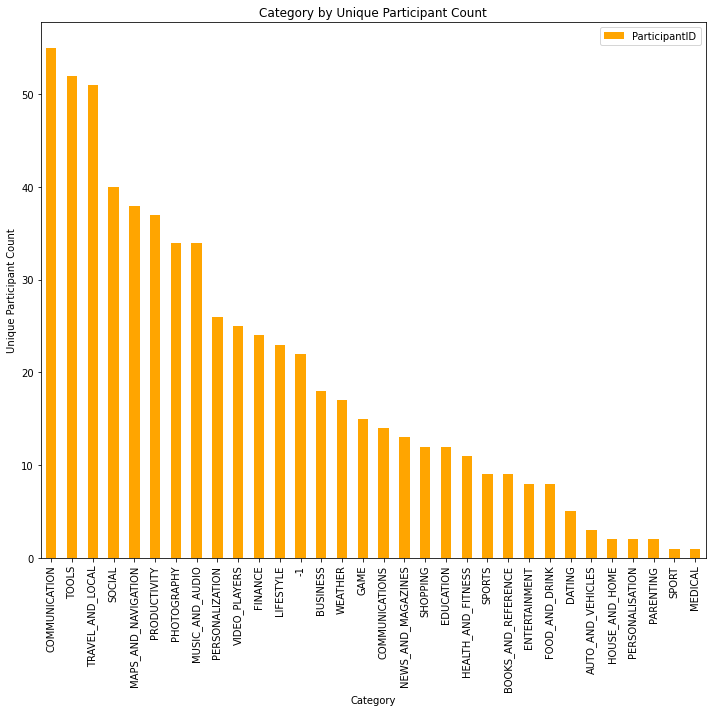

In [26]:
import matplotlib.pyplot as plt

# Assuming sorted_participants_per_app is already defined and sorted by unique participant count
# Adjust top_n to 25

top_n = 32
top_cats = sorted_participants_per_category.head(top_n)

# Plotting
  # Adjust figure size as needed
top_cats.plot(kind='bar', color='orange', figsize = (10,10))
plt.title('Category by Unique Participant Count')
plt.xlabel('Category')
plt.ylabel('Unique Participant Count')
plt.xticks(rotation=90)  # Rotate for better readability

plt.tight_layout()  # Adjust layout
plt.savefig('Category_by_Unique_Participant.png')
plt.show()



In [27]:
sorted_participants_per_category.describe()

,ParticipantID
count,32.000000
mean,19.468750
std,15.827669
min,1.000000
25%,8.000000
50%,14.500000
75%,28.000000
max,55.000000


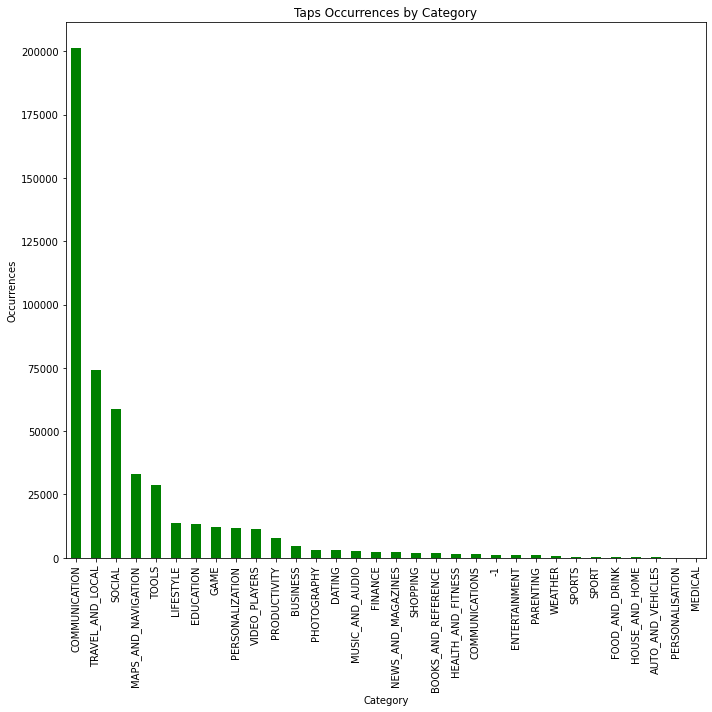

In [28]:
from collections import Counter

# Flatten the list of all applications from all rows
all_applications = [app for apps in filtered_maps_navigation['application'] for app in apps]

# Count occurrences of each application
app_occurrences = Counter(all_applications)

# Aggregate occurrences by category
category_occurrences = Counter()
for app, count in app_occurrences.items():
    category = application_to_category.get(app, "Unknown")  # Use "Unknown" if app is not in the mapping
    category_occurrences[category] += count

# Convert to a pandas Series for plotting
category_occurrences_series = pd.Series(category_occurrences).sort_values(ascending=False)

category_occurrences_series.plot(kind='bar', figsize=(10, 10), color='green')
plt.title('Taps Occurrences by Category')
plt.xlabel('Category')
plt.ylabel('Occurrences')
plt.tight_layout()  # Adjust layout
plt.savefig('Taps_Occurrences_by_Category.png')
plt.show()


In [29]:
category_occurrences_series.to_frame().describe()


,0
count,32.000000
mean,15553.000000
std,37931.081844
min,2.000000
25%,890.750000
50%,2420.500000
75%,11810.750000
max,201309.000000


In [30]:
# Flatten the application lists and associate each app with a participant ID
app_participant_pairs = [(app, row['partId']) for _, row in filtered_maps_navigation.iterrows() for app in row['application']]

# Convert to DataFrame
app_participant_df = pd.DataFrame(app_participant_pairs, columns=['Application', 'ParticipantID'])

# Drop duplicates to count each participant only once per application
unique_app_participant_df = app_participant_df.drop_duplicates()

# Count unique participants per application
participants_per_app = unique_app_participant_df.groupby('Application').count()

# Sort the counts for better visualization
sorted_participants_per_app = participants_per_app.sort_values(by='ParticipantID', ascending=False)



In [31]:
total_unique_apps = unique_app_participant_df['Application'].nunique()
print(f"Total unique applications: {total_unique_apps}")


Total unique applications: 420


In [32]:
sorted_participants_per_app.describe()

,ParticipantID
count,420.000000
mean,2.959524
std,5.773016
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,50.000000


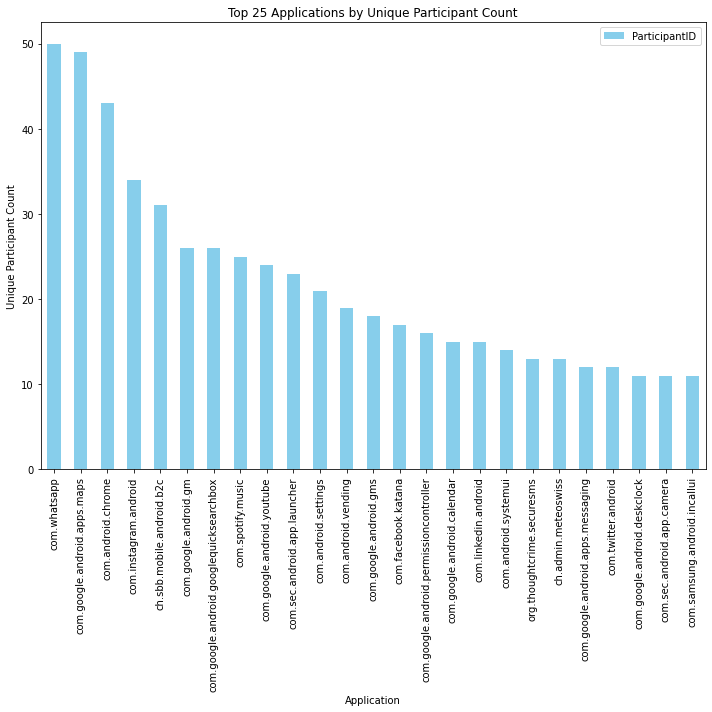

In [33]:
import matplotlib.pyplot as plt

# Assuming sorted_participants_per_app is already defined and sorted by unique participant count
# Adjust top_n to 25

top_n = 25
top_apps = sorted_participants_per_app.head(top_n)

# Plotting
  # Adjust figure size as needed
top_apps.plot(kind='bar', color='skyblue', figsize = (10,10))
plt.title('Top 25 Applications by Unique Participant Count')
plt.xlabel('Application')
plt.ylabel('Unique Participant Count')
plt.xticks(rotation=90)  # Rotate for better readability
plt.savefig('Top25Apps_by_Unique_Participant.png')

plt.tight_layout()  # Adjust layout
plt.show()

In [34]:
sorted_participants_per_app.describe()

,ParticipantID
count,420.000000
mean,2.959524
std,5.773016
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,50.000000


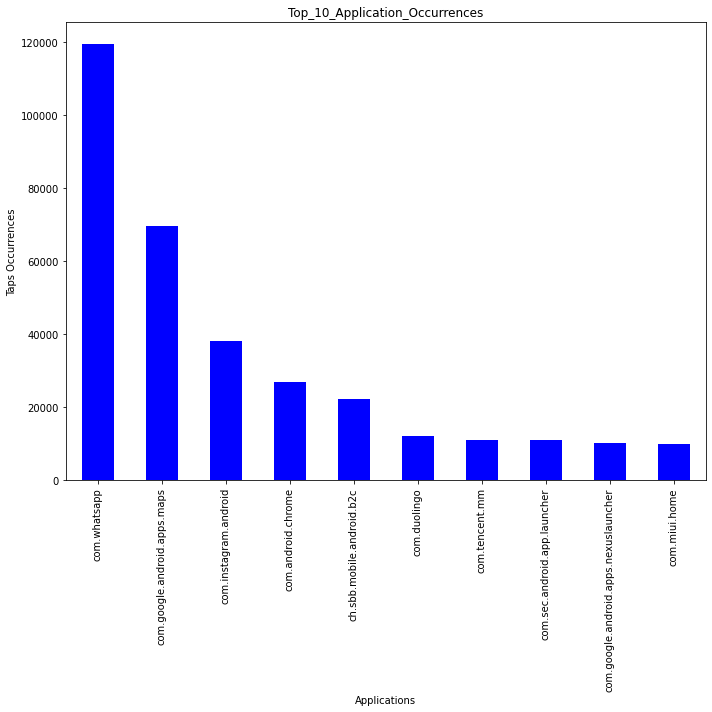

In [35]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the occurrences of each application
app_occurrences = Counter(all_applications)

# Convert to a pandas Series for easier handling and plotting
import pandas as pd
app_occurrences_series = pd.Series(app_occurrences).sort_values(ascending=False)

# Plotting the occurrences of applications
plt.figure(figsize=(10, 10))
app_occurrences_series[:10].plot(kind='bar', color='blue')  # Top 20 for readability
plt.title('Top 10 Taps Occurrences')
plt.xlabel('Applications')
plt.ylabel('Taps Occurrences')
plt.xticks(rotation=90)
plt.title('Top_10_Application_Occurrences')
plt.tight_layout()  # Adjust layout
plt.savefig('Taps_Occurrences_by_Applications.png')
plt.show()


In [36]:
app_occurrences_series.to_frame().describe()

,0
count,420.000000
mean,1184.990476
std,7304.702382
min,1.000000
25%,11.000000
50%,56.500000
75%,281.750000
max,119456.000000


In [37]:
# Calculate the unique applications per partId
unique_apps_per_partId = filtered_maps_navigation.groupby('partId')['application'].apply(lambda apps: set.union(*map(set, apps)))

# Count the number of unique applications for each partId
num_unique_apps_per_partId = unique_apps_per_partId.apply(len)

# Sort the series for better visualization
num_unique_apps_per_partId_sorted = num_unique_apps_per_partId.sort_values(ascending=False)


In [38]:
num_unique_apps_per_partId_sorted.to_frame().describe()

,application
count,56.000000
mean,22.196429
std,12.798323
min,4.000000
25%,11.000000
50%,21.000000
75%,30.250000
max,66.000000


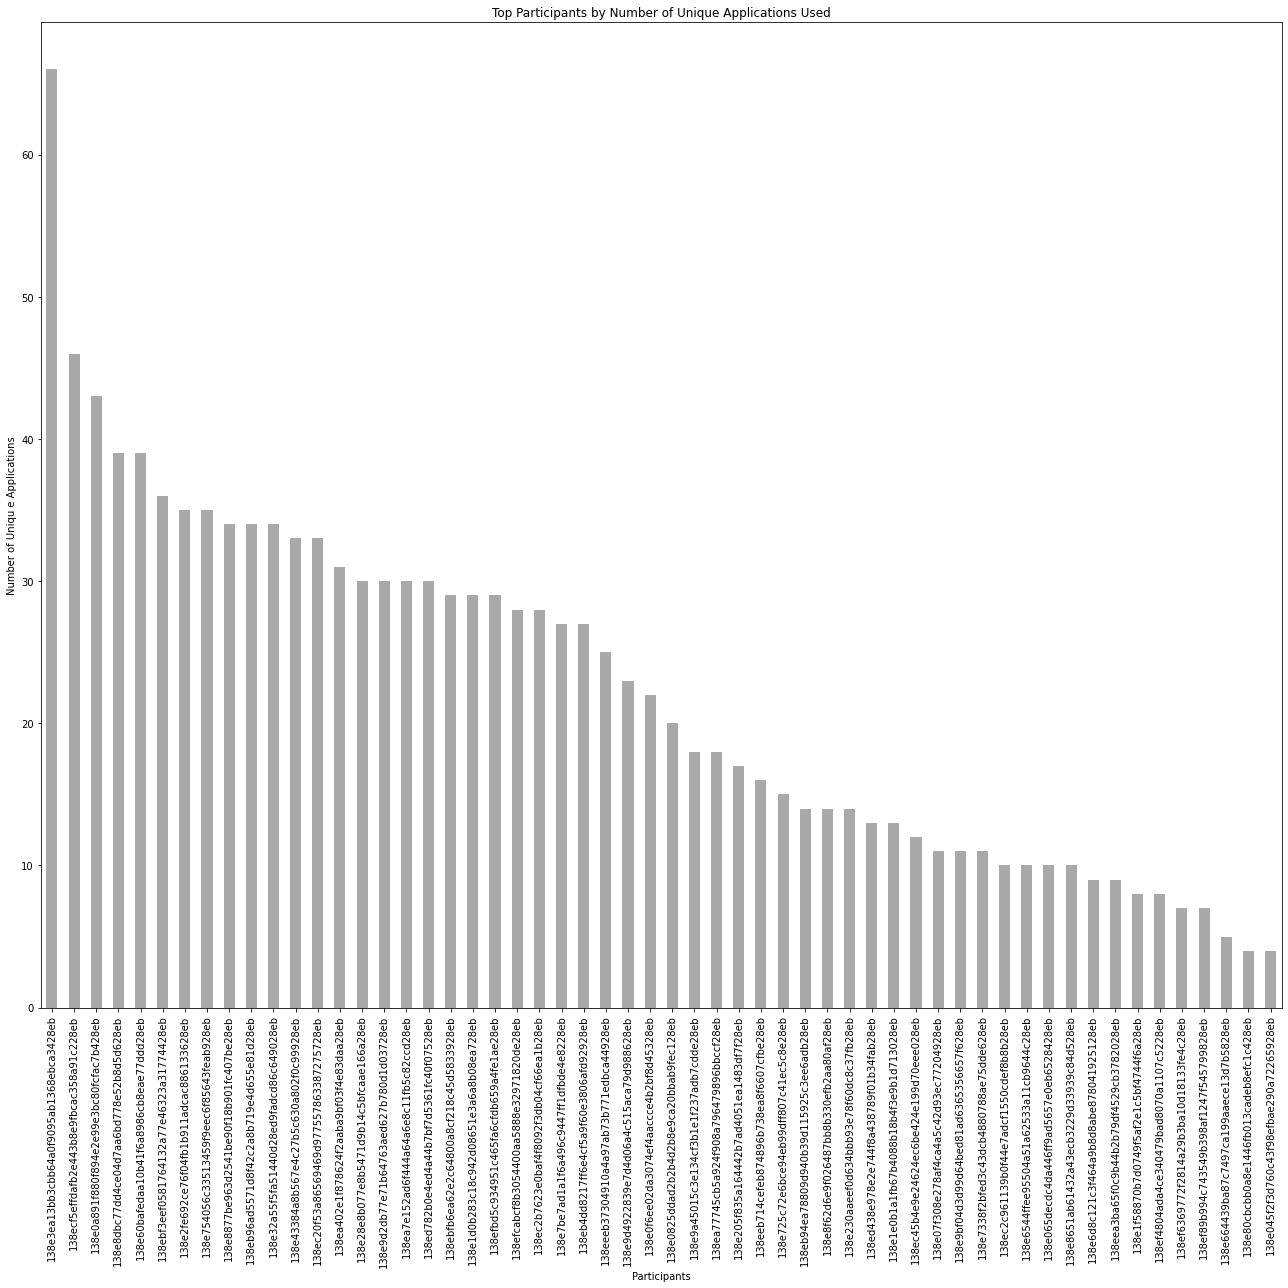

In [39]:
import matplotlib.pyplot as plt

# Consider plotting only the top N participants for clarity
top_n = 56  # Adjust based on your preference
top_participants = num_unique_apps_per_partId_sorted.head(top_n)

# Plotting
plt.figure(figsize=(18, 18))
top_participants.plot(kind='bar', color='darkgray')
plt.title('Top Participants by Number of Unique Applications Used')
plt.xlabel('Participants')
plt.ylabel('Number of Uniqu e Applications')
#plt.xticks(rotation=45, ha="right")  # Rotate for better readability
plt.savefig('Top _Participants_by_Number_of_Unique_Applications_Used.png')

plt.tight_layout()  # Adjust layout
plt.show()


In [40]:
num_unique_apps_per_partId_sorted.to_frame().describe()


,application
count,56.000000
mean,22.196429
std,12.798323
min,4.000000
25%,11.000000
50%,21.000000
75%,30.250000
max,66.000000


# STEP 3: ADD THE BEHAVIOURAL SCORES INFORMATION

In this phase of the analysis, we will enrich our dataset with two primary variables of interest:

- **SBDS_Score**: This variable represents the *Santa Barbara Sense of Direction* score, which is a measure of an individual's innate ability to navigate and understand spatial environments.

- **SA_Score**: Denoting *Spatial Anxiety*, this variable quantifies the level of anxiety or discomfort an individual experiences in situations requiring spatial navigation or orientation.

These variables are crucial for our analysis as they provide insights into the psychological and cognitive aspects of spatial awareness and anxiety, respectively.

In [41]:
# Load the Santa Barbara Sense of Direction Scores of my participants 
data_folder = Path('/Users/donatellazingaro/Desktop/UZH_Leiden_collaboration/SBSD_MoT_score.csv')
data_SBSD = pd.read_csv(data_folder, index_col=0, usecols=['Participant', 'partId', 'Age', 'Gender','SBDS_score'])


data_SBSD = data_SBSD.dropna()
# Reset the index without keeping the old index
data_SBSD = data_SBSD.reset_index(drop=True)

# Now, data_SBSD is cleaned of NA values and has a reset index
data_SBSD

# Load the Spatial Anxiety scores of my participants 
data_folder = Path('/Users/donatellazingaro/Desktop/UZH_Leiden_collaboration/SA_MoT_score .csv')
data_SA = pd.read_csv(data_folder,index_col=0,usecols=['Participant', 'partId', 'Age', 'Gender','SA_Score'])
data_SA = data_SA.dropna()
# Reset the index without keeping the old index
data_SA = data_SA.reset_index(drop=True)
data_SA 

,partId,Age,Gender,SA_Score
0,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,18-24,M,1.54
1,138eb94ea78809d940b39d115925c3ee6adb28eb,25-34,M,2.23
2,138ebf3eef0581764132a77e46323a31774428eb,18-24,M,2.69
3,138e0825ddad2b2b4d2b8e9ca20bbab9fec128eb,25-34,M,3.00
4,138eeb714cefeb874896b738ea8f6607cfbe28eb,35-44,M,1.31
...,...,...,...,...
56,138ed438e978e2e744f8a438789f01b34fab28eb,25-34,M,3.77
57,138e754056c33513459f9eec6f85643feab928eb,25-34,F,2.77
58,138ec20f53a86569469d977557863387275728eb,35-44,M,1.92
59,138e9bf04d3d99d64bed81ad6365356657f628eb,25-34,M,3.92


In [42]:
filtered_maps_navigation

,id,taps,start,stop,appIds0,tapsSession,lengthSession,partId,timeZone,tapDeviceId,application,category
0,018ad520-ce98-11ed-ba2a-dfe7d46df14d,"'1680119342683', '1680119355131', '16801193593...",1680119340000.0,1680121540000.0,"'4', '4', '6', '6', '23', '23', '23', '4', '6'...",574,2193873,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.miui.home, com.miui.home, com.whatsapp, c...","(LIFESTYLE, LIFESTYLE, COMMUNICATION, COMMUNIC..."
1,04e18c70-cfa4-11ed-ba2a-dfe7d46df14d,"'1680220903986', '1680220904266', '16802209049...",1680220900000.0,1680222730000.0,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","(COMMUNICATION, COMMUNICATION, COMMUNICATION, ..."
2,04f2a370-cfa4-11ed-ba2a-dfe7d46df14d,"'1680220903986', '1680220904266', '16802209049...",1680220900000.0,1680222730000.0,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","(COMMUNICATION, COMMUNICATION, COMMUNICATION, ..."
3,04fd78e0-cfa4-11ed-ba2a-dfe7d46df14d,"'1680220903986', '1680220904266', '16802209049...",1680220900000.0,1680222730000.0,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","(COMMUNICATION, COMMUNICATION, COMMUNICATION, ..."
4,051edc40-cc72-11ed-ba2a-dfe7d46df14d,"'1679902268000', '1679902268713', '16799022821...",1679902250000.0,1679902300000.0,"'4', '4', '20', '20', '20', '20', '20'",7,27638,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.miui.home, com.miui.home, com.google.andr...","(LIFESTYLE, LIFESTYLE, TRAVEL_AND_LOCAL, TRAVE..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4321,bfe6041f-3f74-42a1-87a3-8ce1f144c8f5,"'1687679228006', '1687679228415', '16876792284...",1687679130000.0,1687679260000.0,"'13', '13', '13', '13', '13', '13', '13', '13'...",42,26463,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',"[com.google.android.googlequicksearchbox, com....","(TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOO..."
4322,d24a1676-05dd-4ee7-ab7b-abfbe6e57e5a,"'1687679583122', '1687679584175', '16876795855...",1687679580000.0,1687679590000.0,"'13', '20', '2', '2'",4,3094,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',"[com.google.android.googlequicksearchbox, com....","(TOOLS, TRAVEL_AND_LOCAL, TOOLS, TOOLS)"
4323,f88771f5-8e02-48e1-93bc-7c7fe7b23564,"'1687926778680', '1687926779084', '16879267794...",1687926770000.0,1687926830000.0,"'2', '2', '2', '2', '2', '2', '2', '20', '20',...",36,52744,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',"[com.lge.launcher3, com.lge.launcher3, com.lge...","(TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOO..."
4324,f8c448f8-734a-4180-a8cc-4cf2bed6adb2,"'1686322041785', '1686322042357', '16863220466...",1686322040000.0,1686322560000.0,"'3', '3', '4', '4', '4', '4', '2', '2', '2', '...",559,518806,138e9bf04d3d99d64bed81ad6365356657f628eb,'Asia/Karachi','5eea8028-43e5-46ad-8eed-84cbf65f36fb',"[com.android.settings, com.android.settings, c...","(TOOLS, TOOLS, COMMUNICATION, COMMUNICATION, C..."


In [43]:
data_SA = data_SA.set_index('partId')
data_SBSD = data_SBSD.set_index('partId')

In [44]:
filtered_maps_navigation = filtered_maps_navigation.set_index('partId')

final_dataframe = pd.merge(filtered_maps_navigation, data_SBSD, on='partId')
final_dataframe = pd.merge(final_dataframe, data_SA, on='partId')
final_dataframe


final_dataframe = final_dataframe.reset_index(drop = False)
final_dataframe

original_shape = final_dataframe.shape
original_shape

# Assuming 'df' is your pandas DataFrame

# Drop the 'gender_x' and 'age_x' columns
final_dataframe = final_dataframe.drop(['Gender_x', 'Age_x'], axis=1)

# Rename 'gender_y' to 'gender' and 'age_y' to 'age'
final_dataframe = final_dataframe.rename(columns={'Gender_y': 'Gender', 'Age_y': 'Age'})


final_dataframe

,partId,id,taps,start,stop,appIds0,tapsSession,lengthSession,timeZone,tapDeviceId,application,category,SBDS_score,Age,Gender,SA_Score
0,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,018ad520-ce98-11ed-ba2a-dfe7d46df14d,"'1680119342683', '1680119355131', '16801193593...",1680119340000.0,1680121540000.0,"'4', '4', '6', '6', '23', '23', '23', '4', '6'...",574,2193873,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.miui.home, com.miui.home, com.whatsapp, c...","(LIFESTYLE, LIFESTYLE, COMMUNICATION, COMMUNIC...",5.13,18-24,M,1.54
1,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,04e18c70-cfa4-11ed-ba2a-dfe7d46df14d,"'1680220903986', '1680220904266', '16802209049...",1680220900000.0,1680222730000.0,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","(COMMUNICATION, COMMUNICATION, COMMUNICATION, ...",5.13,18-24,M,1.54
2,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,04f2a370-cfa4-11ed-ba2a-dfe7d46df14d,"'1680220903986', '1680220904266', '16802209049...",1680220900000.0,1680222730000.0,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","(COMMUNICATION, COMMUNICATION, COMMUNICATION, ...",5.13,18-24,M,1.54
3,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,04fd78e0-cfa4-11ed-ba2a-dfe7d46df14d,"'1680220903986', '1680220904266', '16802209049...",1680220900000.0,1680222730000.0,"'6', '6', '6', '4', '4', '6', '6', '6', '6', '...",1616,1826819,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.whatsapp, com.whatsapp, com.whatsapp, com...","(COMMUNICATION, COMMUNICATION, COMMUNICATION, ...",5.13,18-24,M,1.54
4,138e7be7ad1a1f6a496c9447ff1dfbde4e8228eb,051edc40-cc72-11ed-ba2a-dfe7d46df14d,"'1679902268000', '1679902268713', '16799022821...",1679902250000.0,1679902300000.0,"'4', '4', '20', '20', '20', '20', '20'",7,27638,'Europe/Vienna','9a5c1517-2f31-4cd4-a5f7-951d0fa29775',"[com.miui.home, com.miui.home, com.google.andr...","(LIFESTYLE, LIFESTYLE, TRAVEL_AND_LOCAL, TRAVE...",5.13,18-24,M,1.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4321,138e9bf04d3d99d64bed81ad6365356657f628eb,bfe6041f-3f74-42a1-87a3-8ce1f144c8f5,"'1687679228006', '1687679228415', '16876792284...",1687679130000.0,1687679260000.0,"'13', '13', '13', '13', '13', '13', '13', '13'...",42,26463,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',"[com.google.android.googlequicksearchbox, com....","(TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOO...",5.53,25-34,M,3.92
4322,138e9bf04d3d99d64bed81ad6365356657f628eb,d24a1676-05dd-4ee7-ab7b-abfbe6e57e5a,"'1687679583122', '1687679584175', '16876795855...",1687679580000.0,1687679590000.0,"'13', '20', '2', '2'",4,3094,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',"[com.google.android.googlequicksearchbox, com....","(TOOLS, TRAVEL_AND_LOCAL, TOOLS, TOOLS)",5.53,25-34,M,3.92
4323,138e9bf04d3d99d64bed81ad6365356657f628eb,f88771f5-8e02-48e1-93bc-7c7fe7b23564,"'1687926778680', '1687926779084', '16879267794...",1687926770000.0,1687926830000.0,"'2', '2', '2', '2', '2', '2', '2', '20', '20',...",36,52744,'Asia/Karachi','23cdf842-3f63-4bec-bd24-cf229e718c1e',"[com.lge.launcher3, com.lge.launcher3, com.lge...","(TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOOLS, TOO...",5.53,25-34,M,3.92
4324,138e9bf04d3d99d64bed81ad6365356657f628eb,f8c448f8-734a-4180-a8cc-4cf2bed6adb2,"'1686322041785', '1686322042357', '16863220466...",1686322040000.0,1686322560000.0,"'3', '3', '4', '4', '4', '4', '2', '2', '2', '...",559,518806,'Asia/Karachi','5eea8028-43e5-46ad-8eed-84cbf65f36fb',"[com.android.settings, com.android.settings, c...","(TOOLS, TOOLS, COMMUNICATION, COMMUNICATION, C...",5.53,25-34,M,3.92


In [45]:
# STEP 4: Exploratory Analysis

#Describe how many participants, data points for mobile map interactions, gps and behavioural measures we have

# Participants = 55 Participants in total
len(final_dataframe['partId'].unique())

56

In [46]:
final_dataframe.columns

Index(['partId', 'id', 'taps', 'start', 'stop', 'appIds0', 'tapsSession',
       'lengthSession', 'timeZone', 'tapDeviceId', 'application', 'category',
       'SBDS_score', 'Age', 'Gender', 'SA_Score'],
      dtype='object')


This code snippet calculates and displays the summary statistics for each of the specified columns across the entire dataset. The `describe` method automatically calculates these statistics, including:
- `count`: The number of non-null entries.
- `mean`: The average value.
- `std`: Standard deviation, a measure of the amount of variation or dispersion of a set of values.
- `min`: The minimum value.
- `25%`: The 25th percentile (first quartile).
- `50%` (median): The median value.
- `75%`: The 75th percentile (third quartile).
- `max`: The maximum value.

This output gives you a comprehensive overview of the central tendency, dispersion, and shape of the dataset's distribution, excluding NaN values. Note that for columns like `'Gender_x'` and `'Gender_y'`, if they contain categorical data (non-numeric), `describe` will not include these in the numerical summary. For categorical data, you might want to use `value_counts()` to get


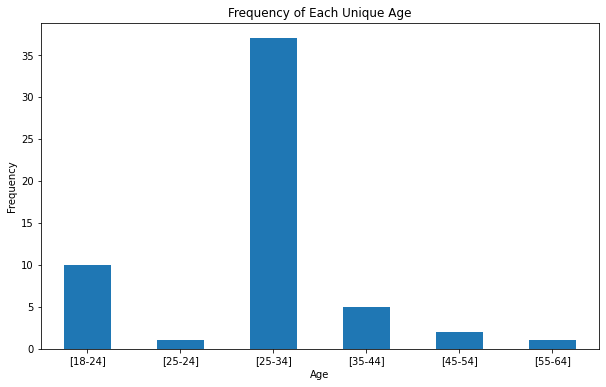

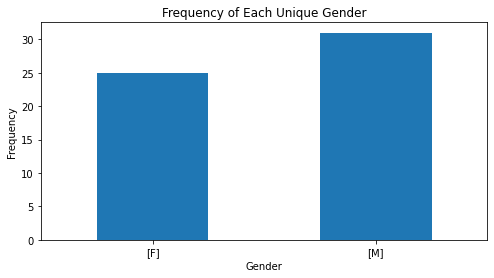

In [48]:
final_dataframe.groupby('partId')['Gender'].unique().value_counts()

final_dataframe.groupby('partId')['Age'].unique().value_counts()

age_counts = final_dataframe.groupby('partId')['Age'].unique().value_counts()
gender_counts = final_dataframe.groupby('partId')['Gender'].unique().value_counts()


import matplotlib.pyplot as plt

# Sorting index is optional but can make the chart easier to read
age_counts.sort_index(inplace=True)

# Plotting with adjusted size
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size as needed
age_counts.plot(kind='bar', ax=ax)
plt.xticks(rotation=0)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency of Each Unique Age')

# Remove the legend if not needed
plt.legend().set_visible(False)

# Save the figure with a specified filename and adjust DPI for better resolution
plt.savefig("Frequency_of_Unique_Age.png", dpi=300)

# Display the plot
plt.show()



import matplotlib.pyplot as plt

# Assuming gender_counts is a Pandas Series with gender frequencies
# Sorting index is optional but can make the chart easier to read
gender_counts.sort_index(inplace=True)

# Plotting with adjusted size
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust figure size as needed
gender_counts.plot(kind='bar', ax=ax)
plt.xticks(rotation=0)

plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Frequency of Each Unique Gender')

# Assuming you don't need the legend for a simple gender frequency chart
plt.legend().set_visible(False)

# Save the figure with a specified filename and adjust DPI for better resolution
plt.savefig("Frequency_of_Unique_Gender.png", dpi=300)

# Display the plot
plt.show()






In [51]:
# Step 1: Deduplicate SBDS_score within each partId group
# This ensures one score per partId, assuming SBDS_score is the same across a participant's records
unique_scores_sbsd = final_dataframe[['partId', 'SBDS_score']].drop_duplicates()

# Step 2: Calculate descriptive statistics on the unique SBDS_scores
descriptive_stats_sbsd = unique_scores_sbsd['SBDS_score'].describe()


#descriptive_stats_sbsd = descriptive_stats_sbsd.to_

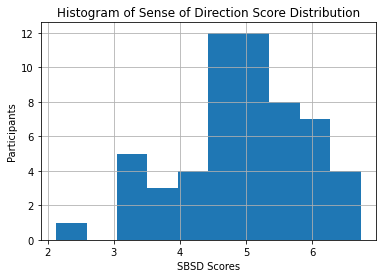

In [53]:

# Create the histogram
unique_scores_sbsd.hist()

# Optional: Customize your plot here
plt.title('Histogram of Sense of Direction Score Distribution')
plt.xlabel('SBSD Scores')
plt.ylabel('Participants')

# Save the histogram to a file
#plt.savefig('data_SBSD_histogram.png')

# Optional: Display the plot if you're in a Jupyter notebook or similar environment
plt.show()

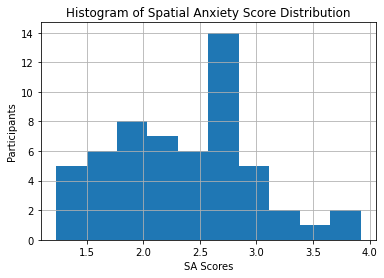

In [54]:
# Convert the Series to a DataFrame
descriptive_stats_sbds_df = descriptive_stats_sbsd.to_frame()

# Optionally, give the column a more descriptive name
descriptive_stats_sbds_df.columns = ['SBSD_Score Statistics']

# Display the DataFrame
descriptive_stats_sbds_df

# This ensures one score per partId, assuming SBDS_score is the same across a participant's records
unique_scores_sa = final_dataframe[['partId', 'SA_Score']].drop_duplicates()

# Step 2: Calculate descriptive statistics on the unique SBDS_scores
descriptive_stats_sa = unique_scores_sa['SA_Score'].describe()
descriptive_stats_sa

# Convert the Series to a DataFrame
descriptive_stats_sa_df = descriptive_stats_sa.to_frame()

# Optionally, give the column a more descriptive name
descriptive_stats_sa_df.columns = ['SA_Score Statistics']

# Display the DataFrame
descriptive_stats_sa_df


# Create the histogram
unique_scores_sa.hist()

# Optional: Customize your plot here
plt.title('Histogram of Spatial Anxiety Score Distribution')
plt.xlabel('SA Scores')
plt.ylabel('Participants')

# Save the histogram to a file
#plt.savefig('data_SA_histogram.png')

# Optional: Display the plot if you're in a Jupyter notebook or similar environment
plt.show()